In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


In [3]:
fpath = 'family_data.csv'
data = pd.read_csv(fpath, index_col='family_id')

fpath = 'sample_submission.csv'
submission = pd.read_csv(fpath, index_col='family_id')

In [4]:
data.head()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
family_id,,,,,,,,,,,
0,52,38,12,82,33,75,64,76,10,28,4
1,26,4,82,5,11,47,38,6,66,61,4
2,100,54,25,12,27,82,10,89,80,33,3
3,2,95,1,96,32,6,40,31,9,59,2
4,53,1,47,93,26,3,46,16,42,39,4


In [5]:
submission.head()

,assigned_day
family_id,
0,100
1,99
2,98
3,97
4,96


In [6]:
columns = list(data.columns)[1:11]
preference = []

for index in submission.index:
    day = submission.loc[index].values[0]
    temp_list = list(data.loc[index,columns].values) #loc gets column values at the specific index
    if day not in temp_list:
        preference.append(10)
    else:
        preference.append(int(temp_list.index(day)))

In [7]:
submission['preference'] = preference
submission['n_people'] = data['n_people']

In [88]:
submission['assigned_day'].unique()

array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91,  90,  89,  88,
        87,  86,  85,  84,  83,  82,  81,  80,  79,  78,  77,  76,  75,
        74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,  63,  62,
        61,  60,  59,  58,  57,  56,  55,  54,  53,  52,  51,  50,  49,
        48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,  36,
        35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,
        22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,  10,
         9,   8,   7,   6,   5,   4,   3,   2,   1])

In [29]:
submission[submission['preference'] == 10]

,assigned_day,preference,n_people
family_id,,,
0,100,10,4
1,99,10,4
2,98,10,3
3,97,10,2
4,96,10,4
...,...,...,...
4994,6,10,4
4995,5,10,4
4996,4,10,2


In [9]:
# Given cost function for families not getting their desired preferences
def top_pref_penalty(pref,d):
    
    penalty = 0
    n = pref
    
    d = d
    if pref > 0:
        if d == 0:
            penalty += 0
        elif d == 1:
            penalty += 50
        elif d == 2:
            penalty += 50 + 9 * n
        elif d == 3:
            penalty += 100 + 9 * n
        elif d == 4:
            penalty += 200 + 9 * n
        elif d == 5:
            penalty += 200 + 18 * n
        elif d == 6:
            penalty += 300 + 18 * n
        elif d == 7:
            penalty += 300 + 36 * n
        elif d == 8:
            penalty += 400 + 36 * n
        elif d == 9:
            penalty += 500 + 36 * n + 199 * n
        else:
            penalty += 500 + 36 * n + 398 * n
    else:
        pass
        
    return penalty

In [30]:
pref_0 = submission[submission['preference'] == 0]
pref_0 = list(pref_0[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_1 = submission[submission['preference'] == 1]
pref_1 = list(pref_1[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_2 = submission[submission['preference'] == 2]
pref_2 = list(pref_2[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_3 = submission[submission['preference'] == 3]
pref_3 = list(pref_3[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_4 = submission[submission['preference'] == 4]
pref_4 = list(pref_4[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_5 = submission[submission['preference'] == 5]
pref_5 = list(pref_5[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_6 = submission[submission['preference'] == 6]
pref_6 = list(pref_6[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_7 = submission[submission['preference'] == 7]
pref_7 = list(pref_7[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_8 = submission[submission['preference'] == 8]
pref_8 = list(pref_8[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_9 = submission[submission['preference'] == 9]
pref_9 = list(pref_9[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

pref_10 = submission[submission['preference'] == 10]
pref_10 = list(pref_10[['assigned_day','n_people']].groupby('assigned_day').sum()['n_people'].values)

In [139]:
labels = list(np.sort(submission.preference.unique()))
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Int64Index([ 1,  3,  4,  7,  9, 11, 12, 13, 15, 16, 20, 26, 28, 31, 32, 33, 39,
            45, 46, 50, 51, 54, 58, 60, 62, 66, 67, 68, 80, 81, 82, 86, 87, 88,
            89, 92, 94],
           dtype='int64', name='assigned_day')

In [233]:
def pref_count(df,pref):
    
    if pref == 11:
        pref_df = df[['assigned_day','n_people']].groupby('assigned_day').sum()
    else:
        pref_df = df[df['preference'] == pref][['assigned_day','n_people']].groupby('assigned_day').sum()
    
    count = [0]*100

    for index,row in pref_df.iterrows():
        index = index - 1
        count[index] = row['n_people']

    return count

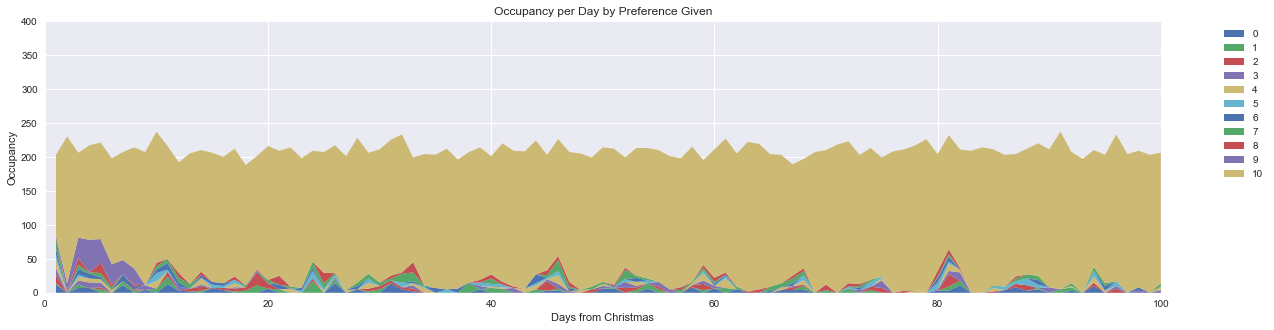

In [234]:
plt.close('all')
plt.style.use('seaborn')

# Labels for stacked plot
labels = list(np.sort(submission.preference.unique()))

# Creating individual lists for each preference (required for stacked plot)
pref_0 = pref_count(submission,0)
pref_1 = pref_count(submission,1)
pref_2 = pref_count(submission,2)
pref_3 = pref_count(submission,3)
pref_4 = pref_count(submission,4)
pref_5 = pref_count(submission,5)
pref_6 = pref_count(submission,6)
pref_7 = pref_count(submission,7)
pref_8 = pref_count(submission,8)
pref_9 = pref_count(submission,9)
pref_10 = pref_count(submission,10)

# Getting days from Occupancy dataframe
x = list(range(1,101))

# Setting figure
fig, ax = plt.subplots(figsize=(20,5))

# Formatting plot area
ax.set_xlabel('Days from Christmas')
ax.set_ylabel('Occupancy')
ax.set_ylim(0,400)
ax.set_xlim(0,100)

# Creating plot
ax.stackplot(x,pref_0,pref_1,pref_2,pref_3,pref_4,pref_5,pref_6,pref_7,pref_8,pref_9,pref_10,labels=labels)
ax.legend(loc=1,bbox_to_anchor=(1.1, 1))
ax.set_title('Occupancy per Day by Preference Given')

plt.show()

In [235]:
# Given cost function for families not getting their desired preferences
def top_pref_penalty(pref,n):
    
    penalty = 0
    d = pref
    
    if pref > 0:
        if d == 0:
            penalty += 0
        elif d == 1:
            penalty += 50
        elif d == 2:
            penalty += 50 + 9 * n
        elif d == 3:
            penalty += 100 + 9 * n
        elif d == 4:
            penalty += 200 + 9 * n
        elif d == 5:
            penalty += 200 + 18 * n
        elif d == 6:
            penalty += 300 + 18 * n
        elif d == 7:
            penalty += 300 + 36 * n
        elif d == 8:
            penalty += 400 + 36 * n
        elif d == 9:
            penalty += 500 + 36 * n + 199 * n
        else:
            penalty += 500 + 36 * n + 398 * n
    else:
        pass
        
    return penalty

In [236]:
submission['pref_pen'] = 0
submission['pref_pen'] = submission.apply(lambda x: top_pref_penalty(x['preference'],x['n_people']),axis=1)

In [237]:
submission.head()

,assigned_day,preference,n_people,pref_pen
family_id,,,,
0,100,10,4,2236
1,99,10,4,2236
2,98,10,3,1802
3,97,10,2,1368
4,96,10,4,2236


In [238]:
occupancy = pd.DataFrame()
occupancy['daily_vol'] = pref_count(submission,11)
occupancy['acct_cost'] = 100000
occupancy.index += 1

In [239]:
# First day is special
occupancy.loc[days[0]]['acct_cost'] = (occupancy.loc[days[0]]['daily_vol']-125.0) / 400.0 *\
                                       occupancy.loc[days[0]]['daily_vol']**(0.5)

days = list(range(100,0,-1))

# Loop over the rest of the days, keeping track of previous count
yesterday_count = occupancy.loc[days[0]]['daily_vol']
for day in days[1:]:
    
    today_count = occupancy.loc[day]['daily_vol']
    diff = abs(today_count - yesterday_count)
    occupancy.loc[day]['acct_cost'] = max(0., (occupancy.loc[day]['daily_vol']-125.0) / 400.0 *\
                                              occupancy.loc[day]['daily_vol']**(0.5 + diff / 50.0))
    yesterday_count = today_count

In [240]:
occupancy.head()

,daily_vol,acct_cost
1,203,48
2,230,54
3,206,9
4,217,5
5,221,42


In [241]:
data[columns].head()

,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9
family_id,,,,,,,,,,
0,52,38,12,82,33,75,64,76,10,28
1,26,4,82,5,11,47,38,6,66,61
2,100,54,25,12,27,82,10,89,80,33
3,2,95,1,96,32,6,40,31,9,59
4,53,1,47,93,26,3,46,16,42,39


In [278]:
occupancy.loc[100]

daily_vol    206
Name: 100, dtype: int64

In [292]:
submission2 = submission.copy()
columns = ['choice_0','choice_1','choice_2','choice_3','choice_4',\
           'choice_5','choice_6','choice_7','choice_8','choice_9']

for index,row in submission2.iterrows():
    pref = 0
    
    occupancy = pd.DataFrame()
    occupancy['daily_vol'] = pref_count(submission2,11)
    occupancy.index += 1
    
    current_day = row['assigned_day']
    
    if row['assigned_day'] == 100:
        prev_day = 100
    else:
        prev_day = row['assigned_day'] + 1
    
    for day in list(data[columns].loc[index].values):
        
        if day == 100: # Skipping preference of Day 0 for now
            prev_day_selection = 100
        else:
            prev_day_selection = day+1
            
            
        if occupancy.loc[day]['daily_vol'] + row['n_people'] <= 300 and\
            occupancy.loc[current_day]['daily_vol'] - row['n_people'] >= 125 and\
            abs(occupancy.loc[current_day]['daily_vol'] - row['n_people'] - occupancy.loc[prev_day]['daily_vol']) <= 30 and\
            abs(occupancy.loc[day]['daily_vol'] + row['n_people'] - occupancy.loc[prev_day_selection]['daily_vol']) <= 30:

            submission2.loc[index]['assigned_day'] = day
            submission2.loc[index]['preference'] = pref

            break

        else:
            pref += 1
            pass

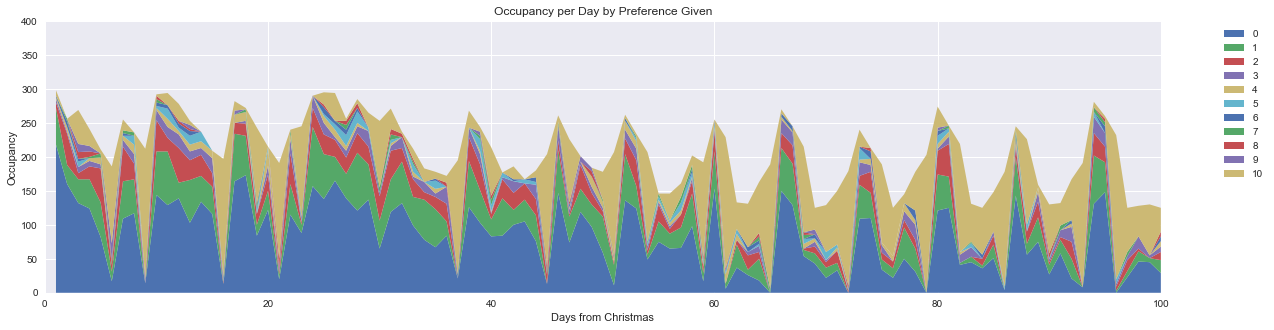

In [293]:
plt.close('all')
plt.style.use('seaborn')

# Labels for stacked plot
labels = list(np.sort(submission2.preference.unique()))

# Creating individual lists for each preference (required for stacked plot)
pref_0 = pref_count(submission2,0)
pref_1 = pref_count(submission2,1)
pref_2 = pref_count(submission2,2)
pref_3 = pref_count(submission2,3)
pref_4 = pref_count(submission2,4)
pref_5 = pref_count(submission2,5)
pref_6 = pref_count(submission2,6)
pref_7 = pref_count(submission2,7)
pref_8 = pref_count(submission2,8)
pref_9 = pref_count(submission2,9)
pref_10 = pref_count(submission2,10)

# Getting days from Occupancy dataframe
x = list(range(1,101))

# Setting figure
fig, ax1 = plt.subplots(figsize=(20,5))

# Formatting plot area
ax1.set_xlabel('Days from Christmas')
ax1.set_ylabel('Occupancy')
ax1.set_ylim(0,400)
ax1.set_xlim(0,100)

# Creating plot
ax1.stackplot(x,pref_0,pref_1,pref_2,pref_3,pref_4,pref_5,pref_6,pref_7,pref_8,pref_9,pref_10,labels=labels)
ax1.legend(loc=1,bbox_to_anchor=(1.1, 1))
ax1.set_title('Occupancy per Day by Preference Given')

plt.show()

In [294]:
submission2['pref_pen'] = submission2.apply(lambda x: top_pref_penalty(x['preference'],x['n_people']),axis=1)

In [295]:
submission2['pref_pen'] = submission2.apply(lambda x: top_pref_penalty(x['preference'],x['n_people']),axis=1)

occupancy = pd.DataFrame()
occupancy['daily_vol'] = pref_count(submission2,11)
occupancy['acct_cost'] = 100000
occupancy.index += 1


# First day is special
occupancy.loc[days[0]]['acct_cost'] = (occupancy.loc[days[0]]['daily_vol']-125.0) / 400.0 *\
                                       occupancy.loc[days[0]]['daily_vol']**(0.5)

days = list(range(100,0,-1))

# Loop over the rest of the days, keeping track of previous count
yesterday_count = occupancy.loc[days[0]]['daily_vol']
for day in days[1:]:
    
    today_count = occupancy.loc[day]['daily_vol']
    diff = abs(today_count - yesterday_count)
    occupancy.loc[day]['acct_cost'] = max(0., (occupancy.loc[day]['daily_vol']-125.0) / 400.0 *\
                                              occupancy.loc[day]['daily_vol']**(0.5 + diff / 50.0))
    yesterday_count = today_count

In [296]:
occupancy.head(10)

,daily_vol,acct_cost
1,298,894
2,256,22
3,269,135
4,241,120
5,211,45
6,186,2818
7,255,42
8,236,58
9,212,16701
10,292,8


In [297]:
score = submission2['pref_pen'].sum() + occupancy['acct_cost'].sum()

submission2[['assigned_day']].to_csv(f'submission_{score}.csv')
print('{0:,}'.format(score))

4,038,588


In [298]:
submission2 = submission.copy()
columns = ['choice_0','choice_1','choice_2','choice_3','choice_4',\
           'choice_5','choice_6','choice_7','choice_8','choice_9']

for index,row in submission2.iterrows():
    pref = 0
    
    occupancy = pd.DataFrame()
    occupancy['daily_vol'] = pref_count(submission2,11)
    occupancy.index += 1
    
    current_day = row['assigned_day']
    
    if row['assigned_day'] == 100:
        prev_day = 100
    else:
        prev_day = row['assigned_day'] + 1
    
    for day in list(data[columns].loc[index].values):
        
        if day == 100: # Skipping preference of Day 0 for now
            prev_day_selection = 100
        else:
            prev_day_selection = day+1
            
        if occupancy.loc[day]['daily_vol'] + row['n_people'] <= 300 and\
            occupancy.loc[current_day]['daily_vol'] - row['n_people'] >= 125 and\
            abs(occupancy.loc[current_day]['daily_vol'] - row['n_people'] - occupancy.loc[prev_day]['daily_vol']) <= 30 and\
            abs(occupancy.loc[day]['daily_vol'] + row['n_people'] - occupancy.loc[prev_day_selection]['daily_vol']) <= 30:

            submission2.loc[index]['assigned_day'] = day
            submission2.loc[index]['preference'] = pref

            break

        else:
            pref += 1
            pass

52
26
100
2
53
59
88
25
18
1
92
19
52
54
45
22
46
47
75
3
80
56
61
19
75
16
58
38
81
89
68
74
24
96
46
31
47
15
13
10
25
31
89
11
49
5
15
45
21
33
67
28
33
37
94
91
12
31
74
39
1
18
1
31
3
47
1
1
89
22
30
11
66
10
82
53
46
20
52
1
18
17
8
88
13
54
29
25
57
23
54
9
85
5
47
24
75
24
3
39
39
53
31
68
96
95
34
12
34
17
67
68
60
18
15
22
77
94
69
4
80
17
24
95
14
47
3
2
56
43
16
11
76
54
18
33
88
82
59
61
1
4
26
38
28
18
64
24
63
40
60
3
88
3
25
100
95
87
13
3
40
47
68
84
18
1
14
95
19
67
30
24
21
68
94
17
52
23
80
26
40
7
94
17
4
80
50
43
10
1
9
54
77
12
95
55
26
59
81
51
46
35
23
38
96
1
28
93
1
9
23
67
10
52
31
1
43
38
38
68
1
17
36
60
4
80
59
49
87
48
57
48
47
87
82
53
37
3
19
61
33
60
60
4
39
4
50
66
33
75
7
75
18
73
18
12
93
74
92
60
25
67
32
48
11
11
32
18
39
30
30
73
43
38
8
15
32
3
54
38
23
22
17
73
16
66
54
47
63
66
25
80
66
67
46
10
39
48
19
32
87
53
4
27
96
58
2
1
47
19
64
89
43
17
39
17
53
25
49
10
7
95
82
48
33
1
26
46
10
19
82
17
10
23
22
68
80
24
74
61
13
58
54
88
23
66
54
5

17
21
18
19
74
8
16
18
4
57
22
17
10
9
32
13
6
31
48
3
73
81
1
99
1
80
96
40
25
93
13
95
62
17
88
47
86
94
12
83
82
48
81
79
78
83
76
75
52
5
72
71
74
69
68
43
20
65
64
58
92
61
18
59
29
39
2
73
54
47
12
51
34
28
47
5
48
45
14
28
4
24
27
42
27
37
11
83
80
17
43
31
30
14
67
38
38
53
62
23
26
21
18
19
38
24
16
29
1
32
99
36
2
9
8
2
6
46
78
3
42
98
14
99
13
97
96
29
18
93
35
1
42
12
88
44
86
27
84
25
82
26
60
79
100
77
76
75
52
46
72
58
70
69
68
13
17
65
64
63
92
61
67
59
100
73
47
12
54
87
17
51
15
67
14
77
4
45
69
11
48
11
40
47
95
37
12
66
28
27
27
31
30
18
67
46
80
49
26
23
8
21
11
19
55
7
16
94
25
39
52
60
34
9
77
12
6
46
76
3
29
83
84
99
8
97
96
32
35
93
91
17
10
18
88
47
86
85
35
33
82
18
53
79
78
77
46
75
95
2
72
71
70
55
68
94
24
65
64
63
77
61
35
59
41
97
41
91
54
22
38
51
50
66
80
26
44
45
74
58
38
81
74
100
38
37
80
26
34
73
5
31
30
4
39
28
10
81
28
23
17
21
26
19
81
4
16
32
78
47
1
57
15
9
55
91
6
17
43
3
46
64
44
99
40
100
96
1
55
93
52
56
7
28
88
28
86
85
84
83
82
55
46
79


In [299]:
def cost_function(prediction):

    penalty = 0

    # We'll use this to count the number of people scheduled each day
    daily_occupancy = {k:0 for k in days}

    # Looping over each family; d is the day for each family f
    for f, d in enumerate(prediction):

        # Using our lookup dictionaries to make simpler variable names
        n = family_size_dict[f]
        choice_0 = choice_dict['choice_0'][f]
        choice_1 = choice_dict['choice_1'][f]
        choice_2 = choice_dict['choice_2'][f]
        choice_3 = choice_dict['choice_3'][f]
        choice_4 = choice_dict['choice_4'][f]
        choice_5 = choice_dict['choice_5'][f]
        choice_6 = choice_dict['choice_6'][f]
        choice_7 = choice_dict['choice_7'][f]
        choice_8 = choice_dict['choice_8'][f]
        choice_9 = choice_dict['choice_9'][f]

        # add the family member count to the daily occupancy
        daily_occupancy[d] += n

        # Calculate the penalty for not getting top preference
        if d == choice_0:
            penalty += 0
        elif d == choice_1:
            penalty += 50
        elif d == choice_2:
            penalty += 50 + 9 * n
        elif d == choice_3:
            penalty += 100 + 9 * n
        elif d == choice_4:
            penalty += 200 + 9 * n
        elif d == choice_5:
            penalty += 200 + 18 * n
        elif d == choice_6:
            penalty += 300 + 18 * n
        elif d == choice_7:
            penalty += 300 + 36 * n
        elif d == choice_8:
            penalty += 400 + 36 * n
        elif d == choice_9:
            penalty += 500 + 36 * n + 199 * n
        else:
            penalty += 500 + 36 * n + 398 * n

    # for each date, check total occupancy
    #  (using soft constraints instead of hard constraints)
    for _, v in daily_occupancy.items():
        if (v > MAX_OCCUPANCY) or (v < MIN_OCCUPANCY):
            penalty += 100000000

    # Calculate the accounting cost
    # The first day (day 100) is treated special
    accounting_cost = (daily_occupancy[days[0]]-125.0) / 400.0 * daily_occupancy[days[0]]**(0.5)
    # using the max function because the soft constraints might allow occupancy to dip below 125
    accounting_cost = max(0, accounting_cost)
    
    # Loop over the rest of the days, keeping track of previous count
    yesterday_count = daily_occupancy[days[0]]
    for day in days[1:]:
        today_count = daily_occupancy[day]
        diff = abs(today_count - yesterday_count)
        accounting_cost += max(0, (daily_occupancy[day]-125.0) / 400.0 * daily_occupancy[day]**(0.5 + diff / 50.0))
        yesterday_count = today_count

    penalty += accounting_cost

    return penalty

In [300]:
family_size_dict = data[['n_people']].to_dict()['n_people']

cols = [f'choice_{i}' for i in range(10)]
choice_dict = data[cols].to_dict()

N_DAYS = 100
MAX_OCCUPANCY = 300
MIN_OCCUPANCY = 125

# from 100 to 1
days = list(range(N_DAYS,0,-1))

In [314]:
# Start with the sample submission values
best = submission2['assigned_day'].tolist()
start_score = cost_function(best)

new = best.copy()
# loop over each family
for fam_id, _ in enumerate(best):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)
# submission2.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 506001.5294946005


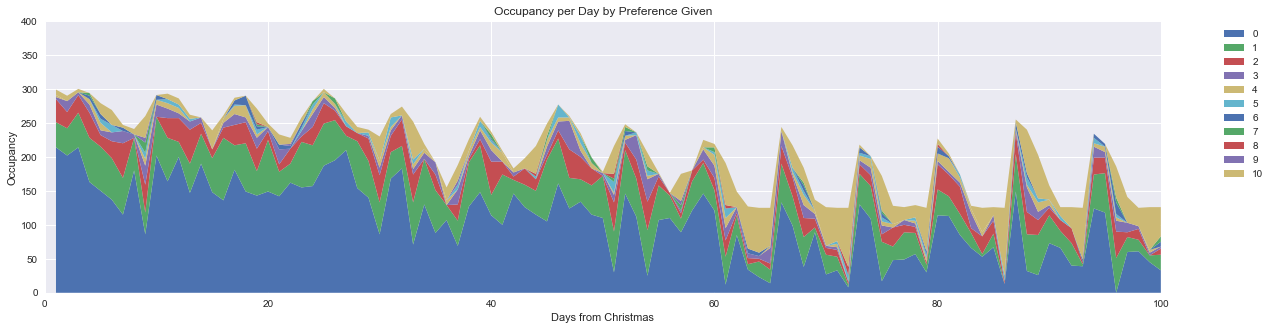

In [315]:
plt.close('all')
plt.style.use('seaborn')

# Labels for stacked plot
labels = list(np.sort(submission2.preference.unique()))

# Creating individual lists for each preference (required for stacked plot)
pref_0 = pref_count(submission2,0)
pref_1 = pref_count(submission2,1)
pref_2 = pref_count(submission2,2)
pref_3 = pref_count(submission2,3)
pref_4 = pref_count(submission2,4)
pref_5 = pref_count(submission2,5)
pref_6 = pref_count(submission2,6)
pref_7 = pref_count(submission2,7)
pref_8 = pref_count(submission2,8)
pref_9 = pref_count(submission2,9)
pref_10 = pref_count(submission2,10)

# Getting days from Occupancy dataframe
x = list(range(1,101))

# Setting figure
fig, ax1 = plt.subplots(figsize=(20,5))

# Formatting plot area
ax1.set_xlabel('Days from Christmas')
ax1.set_ylabel('Occupancy')
ax1.set_ylim(0,400)
ax1.set_xlim(0,100)

# Creating plot
ax1.stackplot(x,pref_0,pref_1,pref_2,pref_3,pref_4,pref_5,pref_6,pref_7,pref_8,pref_9,pref_10,labels=labels)
ax1.legend(loc=1,bbox_to_anchor=(1.1, 1))
ax1.set_title('Occupancy per Day by Preference Given')

plt.show()

In [316]:
others_list = []
for ind,row in submission2.iterrows():
    if row['assigned_day'] not in data.iloc[ind,:-1].to_list():
        others_list.append(ind)

In [312]:
submission2.loc[2429]

assigned_day      71
preference        10
n_people           5
pref_pen        2670
Name: 2429, dtype: int64

In [317]:
# Lets try to improve score by working on family with otherwise date assigned
best = submission2['assigned_day'].tolist()
start_score = 506001.5294946005

new = best.copy()
# loop over each family
for _, fam_id in enumerate(others_list):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)

#submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 506001.5294946005


In [320]:
list_9 = []
for ind,row in submission2.iterrows():
    if row['assigned_day'] == data.iloc[ind,-2]:
        list_9.append(ind)

In [321]:
# Lets try to improve score by working on family with otherwise date assigned
best = submission2['assigned_day'].tolist()
start_score = 506001.5294946005

new = best.copy()
# loop over each family
for _, fam_id in enumerate(list_9):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)

#submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 504976.67035577155


In [327]:
list_8 = []
for ind,row in submission2.iterrows():
    if row['assigned_day'] == data.iloc[ind,-3]:
        list_8.append(ind)

In [328]:
# Lets try to improve score by working on family with otherwise date assigned
best = submission2['assigned_day'].tolist()
start_score = 504976.67035577155

new = best.copy()
# loop over each family
for _, fam_id in enumerate(list_8):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)

#submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 504976.67035577155


In [330]:
list_7 = []
for ind,row in submission2.iterrows():
    if row['assigned_day'] == data.iloc[ind,-4]:
        list_7.append(ind)

In [331]:
# Lets try to improve score by working on family with otherwise date assigned
best = submission2['assigned_day'].tolist()
start_score = 504976.67035577155

new = best.copy()
# loop over each family
for _, fam_id in enumerate(list_7):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)

#submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 502986.20692652895


In [335]:
list_6 = []
for ind,row in submission2.iterrows():
    if row['assigned_day'] == data.iloc[ind,-5]:
        list_6.append(ind)
        
# Lets try to improve score by working on family with otherwise date assigned
best = submission2['assigned_day'].tolist()
start_score = 502986.20692652895

new = best.copy()
# loop over each family
for _, fam_id in enumerate(list_6):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)

#submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 501523.8354030807


In [336]:
list_5 = []
for ind,row in submission2.iterrows():
    if row['assigned_day'] == data.iloc[ind,-6]:
        list_5.append(ind)
        
# Lets try to improve score by working on family with otherwise date assigned
best = submission2['assigned_day'].tolist()
start_score = 501523.8354030807

new = best.copy()
# loop over each family
for _, fam_id in enumerate(list_5):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)

#submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 500365.54425802274


In [337]:
list_4 = []
for ind,row in submission2.iterrows():
    if row['assigned_day'] == data.iloc[ind,-7]:
        list_4.append(ind)
        
# Lets try to improve score by working on family with otherwise date assigned
best = submission2['assigned_day'].tolist()
start_score = 500365.54425802274

new = best.copy()
# loop over each family
for _, fam_id in enumerate(list_4):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)

#submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 499601.71980334586


In [339]:
list_3 = []
for ind,row in submission2.iterrows():
    if row['assigned_day'] == data.iloc[ind,-8]:
        list_3.append(ind)
        
# Lets try to improve score by working on family with otherwise date assigned
best = submission2['assigned_day'].tolist()
start_score = 499601.71980334586

new = best.copy()
# loop over each family
for _, fam_id in enumerate(list_3):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)

#submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 497525.9446725714


In [340]:
list_2 = []
for ind,row in submission2.iterrows():
    if row['assigned_day'] == data.iloc[ind,-9]:
        list_2.append(ind)
        
# Lets try to improve score by working on family with otherwise date assigned
best = submission2['assigned_day'].tolist()
start_score = 497525.9446725714

new = best.copy()
# loop over each family
for _, fam_id in enumerate(list_2):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)

#submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 493321.0413250379


In [341]:
list_1 = []
for ind,row in submission2.iterrows():
    if row['assigned_day'] == data.iloc[ind,-10]:
        list_1.append(ind)
        
# Lets try to improve score by working on family with otherwise date assigned
best = submission2['assigned_day'].tolist()
start_score = 493321.0413250379

new = best.copy()
# loop over each family
for _, fam_id in enumerate(list_1):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)

#submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 487030.84528639313


In [342]:
list_1 = []
for ind,row in submission2.iterrows():
    if row['assigned_day'] == data.iloc[ind,-10]:
        list_1.append(ind)
        
# Lets try to improve score by working on family with otherwise date assigned
best = submission2['assigned_day'].tolist()
start_score = 487030.84528639313

new = best.copy()
# loop over each family
for _, fam_id in enumerate(list_1):
    # loop over each family choice
    for pick in range(10):
        day = choice_dict[f'choice_{pick}'][fam_id]
        temp = new.copy()
        temp[fam_id] = day # add in the new pick
        if cost_function(temp) < start_score:
            new = temp.copy()
            start_score = cost_function(new)

submission2['assigned_day'] = new
score = cost_function(new)

#submission.to_csv(f'submission_{score}.csv')
print(f'Score: {score}')

Score: 484595.5808585888


In [345]:
pref_list = [['list_1',-10],['list_2',-9],['list_3',-8],['list_4',-7],['list_5',-6],['list_6',-5],\
             ['list_7',-4],['list_8',-3],['list_9',-2]]

for lst,i in pref_list:
    print(lst,i)

list_1 -10
list_2 -9
list_3 -8
list_4 -7
list_5 -6
list_6 -5
list_7 -4
list_8 -3
list_9 -2


In [346]:
for i in range(100):
    
    for lst,i in pref_list:
        
        lst = []
        
        for ind,row in submission2.iterrows():
            if row['assigned_day'] == data.iloc[ind,i]:
                lst.append(ind)

        # Lets try to improve score by working on family with otherwise date assigned
        best = submission2['assigned_day'].tolist()
        start_score = score

        new = best.copy()
        # loop over each family
        for _, fam_id in enumerate(lst):
            # loop over each family choice
            for pick in range(10):
                day = choice_dict[f'choice_{pick}'][fam_id]
                temp = new.copy()
                temp[fam_id] = day # add in the new pick
                if cost_function(temp) < start_score:
                    new = temp.copy()
                    start_score = cost_function(new)

        submission2['assigned_day'] = new
        score = cost_function(new)

        #submission.to_csv(f'submission_{score}.csv')
        print(f'Score: {score}')
        
        

Score: 483585.92389240296
Score: 482297.8365855198
Score: 481927.48575397674
Score: 481801.8468743713
Score: 481636.7562620523
Score: 481636.7562620523
Score: 481367.29355687153
Score: 481367.29355687153
Score: 481367.29355687153
Score: 480590.91250998963
Score: 480276.1428796005
Score: 480164.1050692109
Score: 480164.1050692109
Score: 480073.4228428673
Score: 480073.4228428673
Score: 480073.4228428673
Score: 480073.4228428673
Score: 480073.4228428673
Score: 479638.41012357175
Score: 479345.57525035413
Score: 479344.9436000281
Score: 479344.9436000281
Score: 479310.4432392502
Score: 479310.4432392502
Score: 479310.4432392502
Score: 479310.4432392502
Score: 479310.4432392502
Score: 479114.3248700244
Score: 478967.1440679307
Score: 478967.1440679307
Score: 478966.00914521154
Score: 478966.00914521154
Score: 478966.00914521154
Score: 478966.00914521154
Score: 478966.00914521154
Score: 478966.00914521154
Score: 478810.8087432608
Score: 478721.97228633164
Score: 478574.95486364
Score: 47855

KeyboardInterrupt: 

In [348]:
submission2[['assigned_day']].to_csv(f'submission_{score}.csv')